# xDeepFM: Combining Explicit and Implicit Feature Interactions for Recommender Systems
# xDeepFM：推荐系统中显式和隐式特征交互的结合

# ABSTRACT
# 摘要

Combinatorial features are essential for the success of many commercial models. Manually crafting these features usually comes with high cost due to the variety, volume and velocity of raw data in web-scale systems. Factorization based models, which measure interactions in terms of vector product, can learn patterns of combinatorial features automatically and generalize to unseen features as well. With the great success of deep neural networks (DNNs) in various fields, recently researchers have proposed several DNNbased factorization model to learn both low- and high-order feature interactions. Despite the powerful ability of learning an arbitrary function from data, plain DNNs generate feature interactions implicitly and at the bit-wise level. In this paper, we propose a novel Compressed Interaction Network (CIN), which aims to generate feature interactions in an explicit fashion and at the vector-wise level. We show that the CIN share some functionalities with convolutional neural networks (CNNs) and recurrent neural networks (RNNs). We further combine a CIN and a classical DNN into one unified model, and named this new model eXtreme Deep Factorization Machine (xDeepFM). On one hand, the xDeepFM is able to learn certain bounded-degree feature interactions explicitly; on the other hand, it can learn arbitrary low- and high-order feature interactions implicitly. We conduct comprehensive experiments on three real-world datasets. Our results demonstrate that xDeepFM outperforms state-of-the-art models. We have released the source https://github.com/Leavingseason/xDeepFM.

组合特征对于许多商业模型的成功至关重要。由于web级系统中原始数据的多样性、数量和速度，手工制作这些特征通常会带来很高的成本。基于**因子分解**的模型以向量积的形式度量交互作用，可以自动学习组合特征的模式，也可以推广到不可见特征。随着深度神经网络（DNNs）在各个领域的成功应用，近年来研究者提出了几种**基于DNNs的因子分解**模型来学习低阶和高阶特征交互作用。尽管普通DNN具有从数据中学习任意函数的强大能力，但它还是隐式地在逐位级别生成特征交互。在本文中，我们提出了一种新的**压缩交互网络（CIN）**，其目的是**在向量级以显式方式生成特征交互。我们证明了CIN与卷积神经网络（CNNs）和递归神经网络（RNNs）有一些共同的功能**。我们进一步将一个CIN和一个经典的DNN结合成一个统一的模型，并将这个新模型命名为**极端深因式分解机（xDeepFM）**。一方面，xDeepFM能够显式地学习某些有界度特征交互作用；另一方面，它能够隐式地学习任意低阶和高阶特征交互作用。我们在三个真实数据集上进行了综合实验。我们的结果表明xDeepFM优于最先进的模型。我们已经公布了消息来源https://github.com/Leavingseason/xDeepFM。

# KEYWORDS
# 关键词
Factorization machines, neural network, recommender systems, deep learning, feature interactions

因子分解机，神经网络，推荐系统，深度学习，特征交互

# 1 INTRODUCTION
# 1简介

Features play a central role in the success of many predictive systems. Because using raw features can rarely lead to optimal results, data scientists usually spend a lot of work on the transformation of raw features in order to generate best predictive systems [14, 24] or to win data mining games [21, 22, 26]. One major type of feature transformation is the cross-product transformation over categorical features [5]. These features are called cross features or multi-way features, they measure the interactions of multiple raw features. For instance, a 3-way feature AND(user_organization=msra, item_category=deeplearning, time=monday) has value 1 if the user works at Microsoft Research Asia and is shown a technical article about deep learning on a Monday.

特征在许多预测系统的成功中起着核心作用。因为使用原始特征很少能得到最佳结果，所以数据科学家通常会花费大量精力对原始特征进行转换，以生成最佳预测系统[14，24]或赢得数据挖掘比赛[21，22，26]。特征转换的一种主要类型是分类特征上的跨积转换[5]。这些特征称为交叉特征或多向特征，它们度量多个原始特征之间的交互。例如，一个三维特性AND（user_organization=msra，item_category=deeplearning，time=monday）是有值是1，如果用户在微软亚洲研究院工作，并在周一收到一篇关于深度学习的技术文章。

There are three major downsides for traditional cross feature engineering. First, obtaining high-quality features comes with a high cost. Because right features are usually task-specific, data scientists need spend a lot of time exploring the potential patterns from the product data before they become domain experts and extract meaningful cross features. Second, in large-scale predictive systems such as web-scale recommender systems, the huge number of raw features makes it infeasible to extract all cross features manually. Third, hand-crafted cross features do not generalize to unseen interactions in the training data. Therefore, learning to interact features without manual engineering is a meaningful task.

传统的交叉特征工程有**三个主要缺点**。首先，**获得高质量的特性需要很高的成本**。因为正确的特征通常是特定于任务的，所以数据科学家在成为领域专家并提取有意义的交叉特征之前，需要花费大量时间从产品数据中探索潜在的模式。其次，**在大规模预测系统中，如web级推荐系统中，大量的原始特征使得手工提取所有交叉特征是不可行的**。第三，**手工制作的交叉特征不能推广到训练数据中看不见的交互**。因此，学习在没有人工工程的情况下交互特征是一项有意义的任务。

Factorization Machines (FM) [32] embed each feature i to a latent factor vector vi = [vi1,vi2, ...,viD], and pairwise feature interactions are modeled as the inner product of latent vectors:f(2)(i,j) = ⟨vi,vj⟩xixj . In this paper we use the term bit to denote a element (such as vi1) in latent vectors. The classical FM can be extended to arbitrary higher-order feature interactions [2], but one major downside is that, [2] proposes to model all feature interactions, including both useful and useless combinations. As revealed in [43], the interactions with useless features may introduce noises and degrade the performance. In recent years, deep neural networks (DNNs) have become successful in computer vision, speech recognition, and natural language processing with their great power of feature representation learning. It is promising to exploit DNNs to learn sophisticated and selective feature interactions. [46] proposes a Factorisation-machine supported Neural Network (FNN) to learn high-order feature interactions. The Wide&Deep [5] and DeepFM [9] models overcome this problem by introducing hybrid architectures, which contain a shallow component and a deep component with the purpose of learning both memorization and generalization. Therefore they can jointly learn low-order and high-order feature interactions.


因子分解机（FM）[32]将每个特征i嵌入一个潜在因子向量vi = [vi1,vi2, ...,viD]，并成对特征相互作用被建模为潜在向量的内积:f(2)(i,j) = ⟨vi,vj⟩xixj 。在本文中，我们用位来表示一个元素（如vi1）。**经典的FM可以扩展到任意的高阶特征交互**[2]，但是一个主要的**缺点是[2]建议对所有特征交互进行建模，包括有用和无用的组合**。如[43]所示，与无用特征的交互可能会引入噪声并降低性能。近年来，深度神经网络（deep neural networks，DNNs）以其强大的特征表示学习能力在计算机视觉、语音识别和自然语言处理等领域取得了成功。利用DNNs学习复杂的、有选择性的特征交互是很有前景的。[46]提出了**一种因子分解机器支持的神经网络（FNN）来学习高阶特征交互**。在应用DNN之前，它使用预先训练好的因式分解机进行字段嵌入。[31]进一步提出了**一种基于乘积的神经网络（PNN）**，它在嵌入层和DNN层之间引入乘积层，不依赖于预先训练的FM。**FNN和PNN的主要缺点是，它们更多地关注高阶特征交互，而很少捕捉低阶交互**。Wide&Deep[5]和DeepFM[9]模型通过引入混合体系结构来解决这个问题，**混合体系结构包含一个浅层组件和一个深层组件，目的是学习记忆和泛化。因此，他们可以共同学习低阶和高阶特征交互作用**。

All the abovementioned models leverage DNNs for learning high-order feature interactions. However, DNNs model high-order feature interactions in an implicit fashion. The final function learned by DNNs can be arbitrary, and there is no theoretical conclusion on what the maximum degree of feature interactions is. In addition, DNNs model feature interactions at the bit-wise level, which is different from the traditional FM framework which models feature interactions at the vector-wise level. Thus, in the field of recommender systems, whether DNNs are indeed the most effective model in representing high-order feature interactions remains an open question. In this paper, we propose a neural network-based model to learn feature interactions in an explicit, vector-wise fashion. Our approach is based on the Deep & Cross Network (DCN) [40], which aims to efficiently capture feature interactions of bounded degrees. However, we will argue in Section 2.3 that DCN will lead to a special format of interactions. We thus design a novel compressed interaction network (CIN) to replace the cross network in the DCN. CIN learns feature interactions explicitly, and the degree of interactions grows with the depth of the network. Following the spirit of the Wide&Deep and DeepFM models, we combine the explicit high-order interaction module with implicit interaction module and traditional FM module, and name the joint model eXtreme Deep Factorization Machine (xDeepFM). The new model requires no manual feature engineering and release data scientists from tedious feature searching work. To summarize, we make the following contributions:

所有上述模型都利用DNNs来学习高阶特征交互。然而，DNNs以隐式方式模拟高阶特征交互。DNNs所学习的最终函数可以是任意的，关于特征交互的最大程度是什么还没有理论上的结论。另外，**DNNs模型在位层次上描述了特征交互，这与传统FM框架在向量层次上描述特征交互不同**。因此，在推荐系统领域，DNNs是否真的是表示高阶特征交互的最有效模型仍然是一个悬而未决的问题。**在本文中，我们提出了一个基于神经网络的模型来学习一个显式的，向量式的特征交互**。我们的方法基于深度交叉网络（Deep&Cross Network，DCN）[40]，目的是有效地捕获有界度的特征交互。然而，我们将在第2.3节中讨论DCN将导致一种特殊的交互形式。因此，我们设计了**一种新的压缩交互网络（CIN）来取代DCN中的交叉网络**。CIN明确地学习特征交互，交互的程度随着网络的深度而增长。遵循Wide&Deep and DeepFM模型的思想，将显式高阶交互模块、隐式交互模块和传统FM模块相结合，命名为联合模型极深因子分解机（xDeepFM）。新模型不需要人工进行特征工程，并且可以让数据科学家从繁琐的特征搜索工作中解脱出来。总之，我们作出以下贡献：

* We propose a novel model, named eXtreme Deep Factorization Machine (xDeepFM), that jointly learns explicit and implicit high-order feature interactions effectively and requires no manual feature engineering.
* 我们提出了一个新的模型，称为极端深层因子并行化机器（xDeepFM），能有效地联合学习显式和隐式高阶特征交互，不需要人工进行特征工程。

* We design a compressed interaction network (CIN) in xDeepFM that learns high-order feature interactions explicitly. We show that the degree of feature interactions increases at each layer, and features interact at the vector-wise level rather than the bit-wise level.
* 我们在xDeepFM中设计了一个压缩交互网络（CIN），它可以显式地学习高阶特征交互。我们证明了特征交互的程度在每一层都会增加，并且特征交互是在向量级而不是位级。

* We conduct extensive experiments on three real-world dataset, and the results demonstrate that our xDeepFM outperforms several state-of-the-art models significantly.
* 我们在三个真实数据集上进行了广泛的实验，结果表明我们的xDeepFM显著优于几种最先进的模型。

The rest of this paper is organized as follows. Section 2 provides some preliminary knowledge which is necessary for understanding deep learning-based recommender systems. Section 3 introduces our proposed CIN and xDeepFM model in detail. We will present experimental explorations on multiple datasets in Section 4. Related works are discussed in Section 5. Section 6 concludes this paper.

本文的其余部分组织如下。第2节提供了理解基于深度学习的推荐系统所必需的一些初步知识。第三节详细介绍了我们提出的CIN和xDeepFM模型。我们将在第4节中展示对多个数据集的实验探索。相关工作将在第5节中讨论。第六部分是本文的结论。

# 2 PRELIMINARIES
# 2准备工作

## 2.1 Embedding Layer
## 2.1 Embedding 层

In computer vision or natural language understanding, the input data are usually images or textual signals, which are known to be spatially and/or temporally correlated, so DNNs can be applied directly on the raw feature with dense structures. However, in web-scale recommender systems, the input features are sparse, of huge dimension, and present no clear spatial or temporal correlation. Therefore, multi-field categorical form is widely used by related works [9, 31, 37, 40, 46]. For example, one input instance [user_id=s02,gender=male,organization=msra,interests=comedy&rock] is normally transformed into a high-dimensional sparse features via field-aware one-hot encoding:

在计算机视觉或自然语言理解中，输入的数据通常是图像或文本信号，它们在空间和/或时间上具有相关性，因此DNNs可以直接应用于结构密集的原始特征。然而，在web规模的推荐系统中，输入特征稀疏，维数大，没有明显的时空相关性。因此，多领域范畴形式被相关著作广泛使用[9，31，37，40，46]。例如，一个输入实例[用户id=s02，性别=男性，组织=msra，兴趣=喜剧和摇滚]通常是跨文化的通过场感知热编码形成高维稀疏特征：
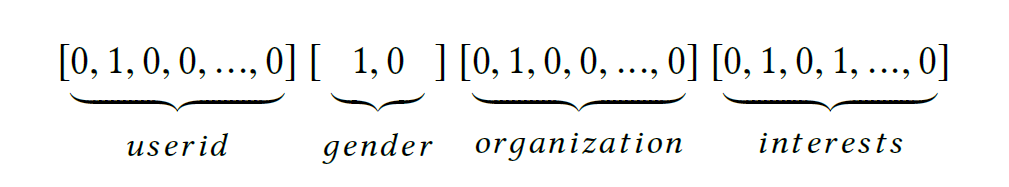

An embedding layer is applied upon the raw feature input to compress it to a low dimensional, dense real-value vector. If the field is univalent, the feature embedding is used as the field embedding. Take the above instance as an example, the embedding of feature male is taken as the embedding of field gender. If the field is multivalent, the sum of feature embedding is used as the field embedding. The embedding layer is illustrated in Figure 1. The result of embedding layer is a wide concatenated vector:

在原始特征输入上加入嵌入层，将其压缩为低维、稠密的实值向量。**如果字段是一价的，则使用特征嵌入作为字段嵌入。以上述实例为例，将特征男性的嵌入作为字段性别的嵌入。如果字段是多价的，则使用特征嵌入的和作为字段嵌入**。嵌入层如图1所示。嵌入层的结果是一个宽的串联向量：

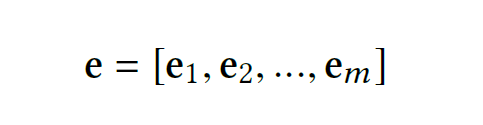

where m denotes the number of fields, and e∈ Rdenotes the embedding of one field. Although the feature lengths of instances can be various, their embeddings are of the same length m × D, where D is the dimension of field embedding.

其中m表示域的个数，ei∈R表示一个域的嵌入。虽然实例的特征长度可以不同，但它们的嵌入长度是m×D，其中D是字段嵌入的维数。

## 2.2 Implicit High-order Interactions
## 2.2 隐式高阶相互作用

FNN [46], Deep Crossing [37], and the deep part in Wide&Deep [5] exploit a feed-forward neural network on the field embedding vector e to learn high-order feature interactions. The forward process is :

FNN[46]、Deep Crossing[37]和Wide&Deep[5]中的Deep部分在嵌入向量e上利用前馈神经网络来学习高阶特征交互。前向过程是：
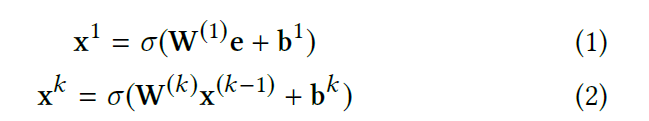

where k is the layer depth, σ is an activation function, and xk is the output of the k-th layer. The visual structure is very similar to what is shown in Figure 2, except that they do not include the FM or Product layer. This architecture models the interaction in a bit-wise fashion. That is to say, even the elements within the same field embedding vector will influence each other.

其中k是层深度，σ是激活函数，xk是第k层的输出。视觉结构与图2所示非常相似，只是它们不包括 FM or Product 层。这种体系结构模型交互带一点时尚。也就是说，即使是同一个字段嵌入向量中的元素也会相互影响。

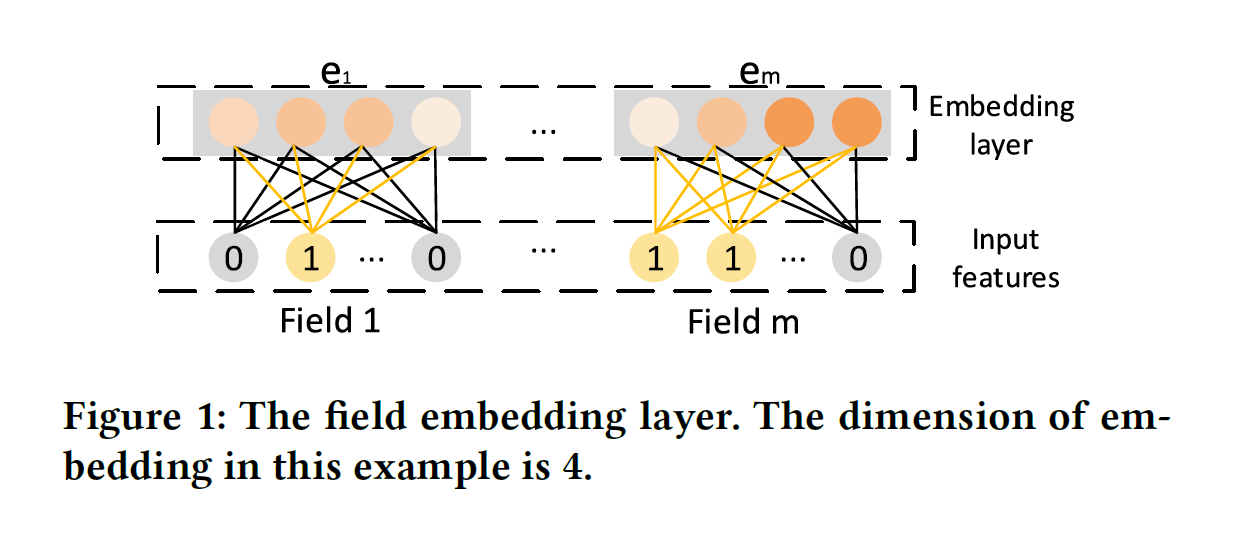




PNN [31] and DeepFM [9] modify the above architecture slightly.Besides applying DNNs on the embedding vector e, they add a twoway interaction layer in the architecture. Therefore, both bit-wise and vector-wise interaction is included in their model. The major difference between PNN and DeepFM, is that PNN connects the outputs of product layer to the DNNs, whereas DeepFM connects the FM layer directly to the output unit (refer to Figure 2).

PNN[31]和DeepFM[9]稍微修改了上述架构。除了在嵌入向量e上应用DNNs之外，他们还在体系结构中添加了一个双向交互层。因此，在他们的模型中包含了位和向量的交互作用。PNN和DeepFM的主要区别在于PNN将product层的输出连接到DNNs，而DeepFM将FM层直接连接到输出单元（参见图2）。

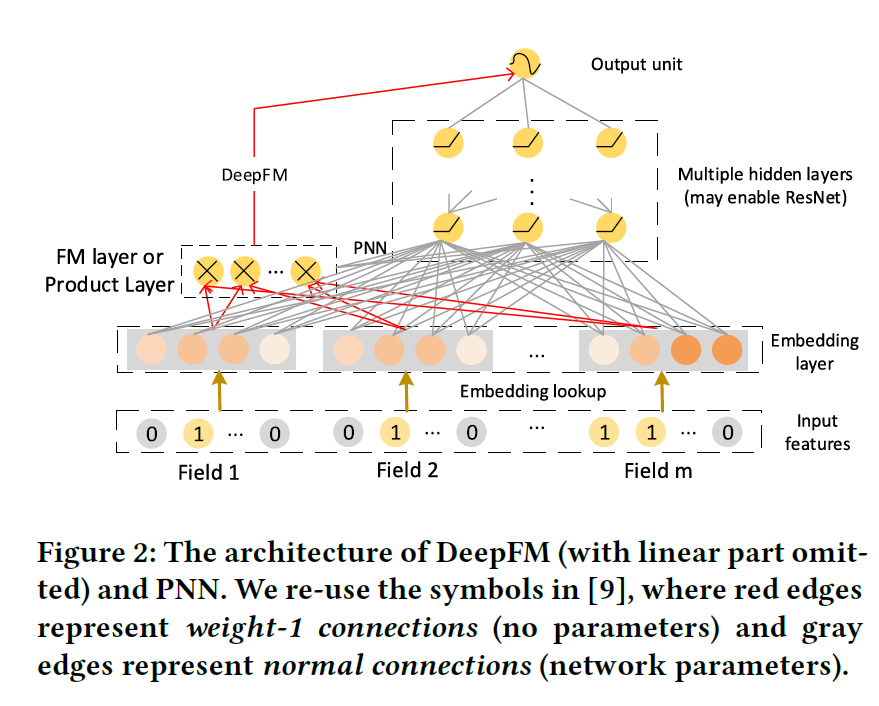

图2:DeepFM（省略线性部分）和PNN的体系结构。我们重复使用[9]中的符号，其中红边表示权重为1的连接（无参数），灰边表示正常连接（网络参数）。

## 2.3 Explicit High-order Interactions
## 2.3显式高阶相互作用

[40] proposes the Cross Network (CrossNet) whose architecture is shown in Figure 3. It aims to explicitly model the high-order feature interactions. Unlike the classical fully-connected feed-forward network, the hidden layers are calculated by the following cross operation:

[40]提出了交叉网络（CrossNet），其架构如图3所示。它的目的是显式地建模高阶特征交互。与经典的全连接前馈网络不同，隐层通过以下交叉运算计算：

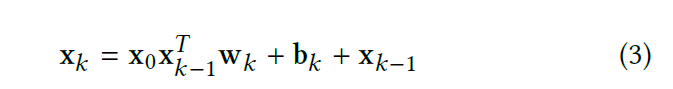

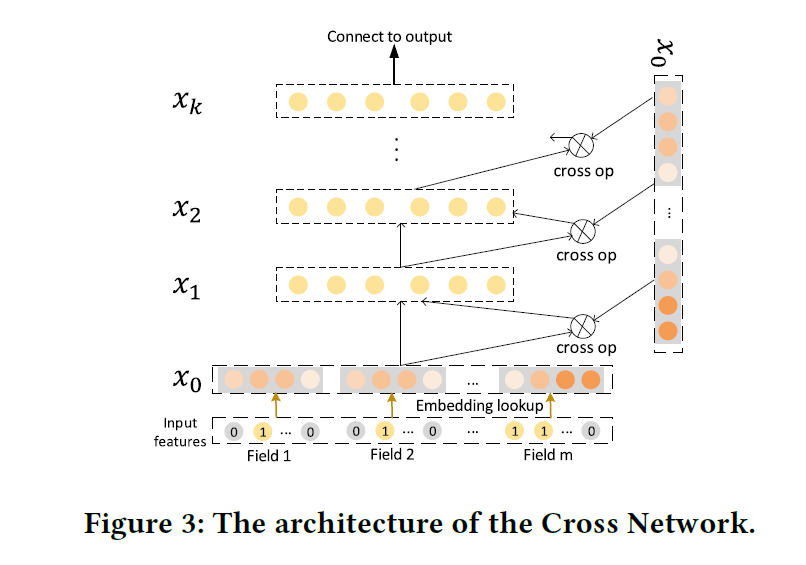

where wk,bk,xk∈ R are weights, bias and output of the k-th layer, respectively. We argue that the CrossNet learns a special type of high-order feature interactions, where each hidden layer in the CrossNet is a scalar multiple of x0.


其中wk，bk，xk∈R分别是第k层的权值、偏差和输出。我们认为交叉网络学习一种特殊类型的高阶特征交互，其中交叉网中的每个隐藏层是x0的标量倍数。

Theorem 2.1. Consider a k-layer cross network with the (i+1)-th layer defined as xi+1 = x0 xi wi+1. Then, the output of the cross network xk is a scalar multiple of x0.

定理2.1。考虑一个K层交叉网络，其中第（i+1）层定义为xi+1 = x0 xi wi+1.。然后，交叉网络xk的输出是x0的标量倍数。

Proof. When k=1, according to the associative law and distributive law for matrix multiplication, we have:

证明。当k=1时，根据矩阵乘法的结合律和分配律，我们得到：

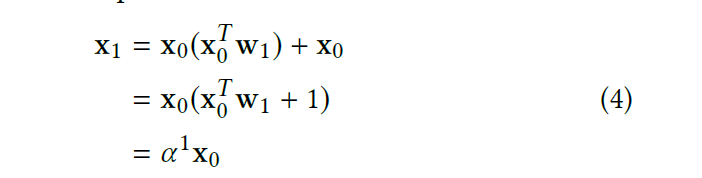

where the scalar α1 = x0w1 + 1 is actually a linear regression of x0. Thus, x1 is a scalar multiple of x0. Suppose the scalar multiple statement holds for k=i. For k=i + 1, we have :

其中标量α1=x0w1+1实际上是x0的线性回归。因此，x1是x0的标量倍数。假设标量multiple语句适用于k=i。对于k=i+1，我们有：

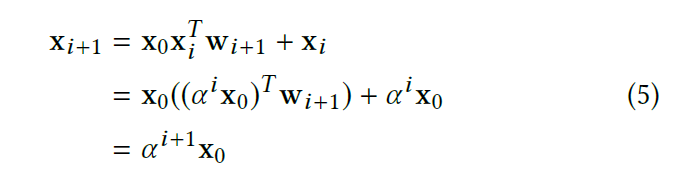

where, αi+1= αi(x0 wi+1 + 1) is a scalar. Thus i+1 is still a scalar multiple of x0. By induction hypothesis, the output of cross network xk is a scalar multiple of x0.

其中，αi+1=αi（x0 wi+1+1）是标量。因此i+1仍然是x0的标量倍数。通过归纳假设，交叉网络xk的输出是x0的标量倍数。

Note that the scalar multiple does not mean xk is linear with x0. The coefficient αi+1 is sensitive with x0. The CrossNet can learn feature interactions very efficiently (the complexity is negligible compared with a DNN model), however the downsides are: (1) the output of CrossNet is limited in a special form, with each hidden layer is a scalar multiple of x0; (2) interactions come in a bit-wise fashion.

请注意，标量倍数并不意味着xk与x0呈线性关系。系数αi+1对x0很敏感。CrossNet可以非常有效地学习特征交互（与DNN模型相比，复杂性可以忽略不计），但是缺点是：**（1）CrossNet的输出以一种特殊的形式受到限制，每个隐藏层都是x0的标量倍数；（2）交互以位方式出现。**

# 3 OUR PROPOSED MODEL
# 3我们提出的模型

## 3.1 Compressed Interaction Network
## 3.1压缩交互网络

We design a new cross network, named Compressed Interaction Network (CIN), with the following considerations: (1) interactions are applied at vector-wise level, not at bit-wise level; (2) high-order feature interactions is measured explicitly; (3) the complexity of network will not grow exponentially with the degree of interactions.

我们设计了一种新的交叉网络，称为压缩交互网络（Compressed Interaction network，CIN），它考虑了以下几个方面：**（1）交互作用是在向量级应用的，而不是在位级应用的；（2）高阶特征交互作用是显式测量的；（3）网络的复杂度不会随着交互作用的程度呈指数增长的。**

Since an embedding vector is regarded as a unit for vector-wise interactions, hereafter we formulate the output of field embedding as a matrix X∈ R, where the i-th row in X0 is the embedding vector of the i-th field: Xi = ei, and D is the dimension of the field embedding. The output of the k-th layer in CIN is also a matrix Xk∈ R, where Hk denotes the number of (embedding) feature vectors in the k-th layer and we let H0 = m. For each layer, Xk are calculated via:

由于嵌入向量被视为向量相互作用的一个单位，下面我们将场嵌入的输出表示为矩阵X∈R，其中X0中的第i行是第i个字段的嵌入向量：Xi=ei，D是字段嵌入的维数。CIN中第k层的输出也是一个矩阵Xk∈R，其中Hk表示第k层中（嵌入）特征向量的数量，我们假设H0=m。对于每一层，Xk通过以下公式计算：

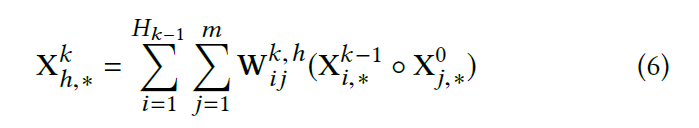

where 1 ≤ h ≤ Hk, W∈ R is the parameter matrix for the h-th feature vector, and ◦ denotes the Hadamard product, for example, ⟨a1,a2,a3⟩◦⟨b1,b2,b3⟩ = ⟨a11,a22,a33⟩. Note that Xk is derived via the interactions between Xk-1 and X0, thus feature interactions are measured explicitly and the degree of interactions increases with the layer depth. The structure of CIN is very similar to the Recurrent Neural Network (RNN), where the outputs of the next hidden layer are dependent on the last hidden layer and an additional input. We hold the structure of embedding vectors at all layers, thus the interactions are applied at the vector-wise level

其中1≤h≤Hk，W∈R为第h特征向量的参数矩阵，°表示阿达玛积，如⟨a1、a2、a3⟩⟨⟨b1、b2、b3⟩=⟨a11、a22、a33⟩。注意，Xk是通过Xk-1和X0之间的相互作用导出的，因此特征相互作用被明确地测量，并且相互作用的程度随着层深度的增加而增加。CIN的结构与递归神经网络（RNN）非常相似，下一个隐层的输出依赖于最后一个隐层和一个额外的输入。我们在所有层上都保持嵌入向量的结构，因此交互作用被应用于向量级。

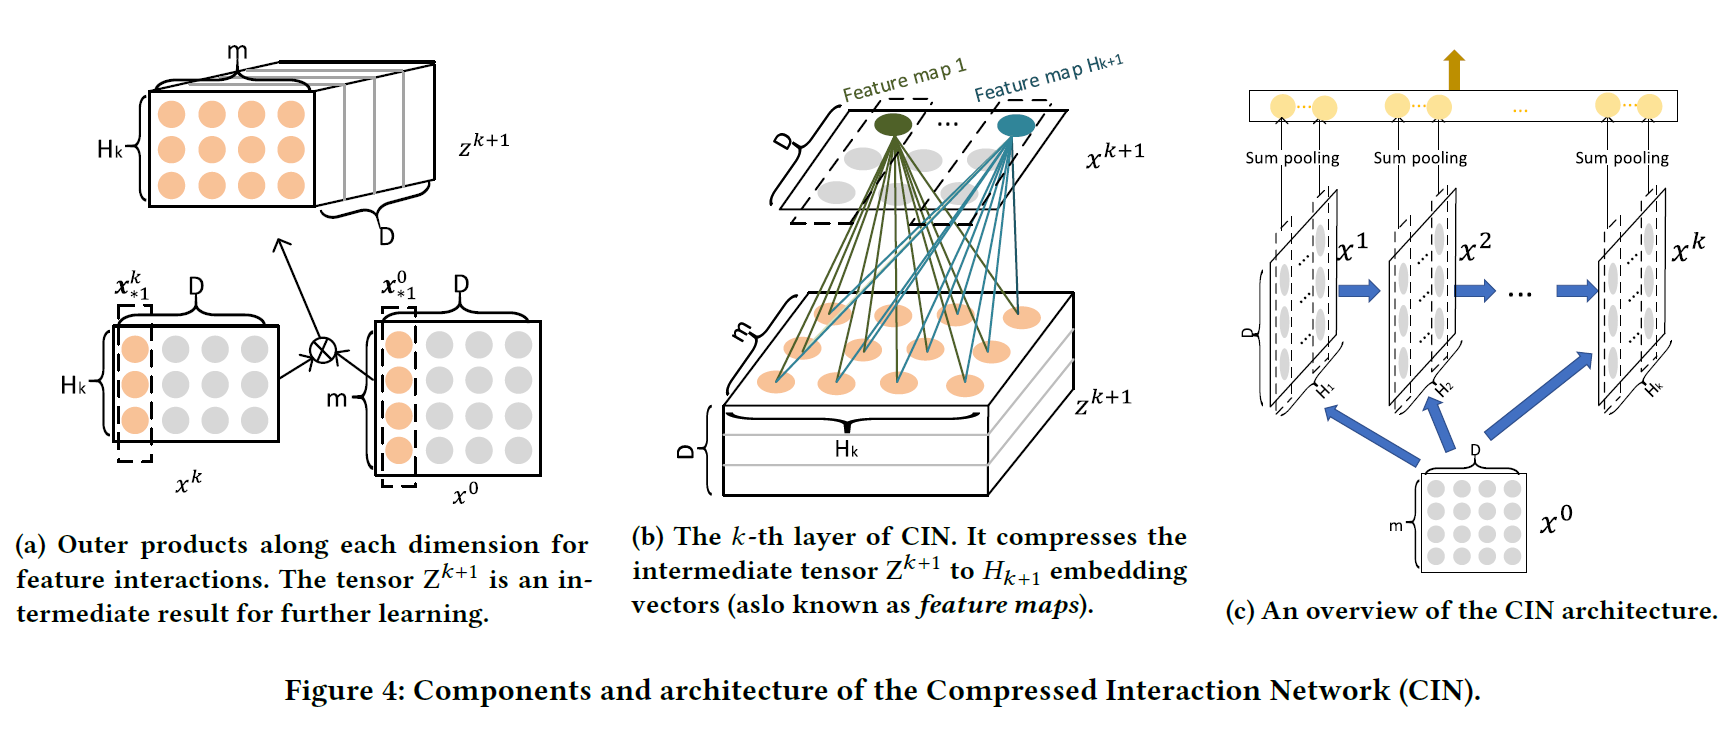

It is interesting to point out that Equation 6 has strong connections with the well-known Convolutional Neural Networks (CNNs) in computer vision. As shown in Figure 4a, we introduce an intermediate tensor Zk+1, which is the outer products (along each embedding dimension) of hidden layer Xk and original feature matrix X0. Then Zk+1 can be regarded as a special type of image and Wk,h,is a filter. We slide the filter across Zk+1 along the embedding dimension (D) as shown in Figure 4b, and get an hidden vector Xk+1, which is usually called a feature map in computer vision Therefore, Xk is a collection of Hdifferent feature maps. The termkk “compressed" in the name of CIN indicates that the k-th hidden layer compress the potential space of Hk-1×m vectors down to vectors.


有趣的是，方程6与计算机视觉中著名的卷积神经网络（CNNs）有很强的联系。如图4a所示，我们引入了中间张量Zk+1，它是隐藏层Xk和原始特征矩阵X0的外积（沿每个嵌入维）。那么Zk+1可以看作是一种特殊类型的图像，Wk，h是一种滤波器。如图4b所示，我们沿着嵌入维（D）滑动滤波器穿过Zk+1，得到一个隐藏向量Xk+1，它在计算机视觉中通常被称为特征图，因此Xk是不同特征图的集合。CIN名称中的“compressed”表示第k隐层将Hk-1×m向量的位空间压缩为向量。


Figure 4c provides an overview of the architecture of CIN. Let T denotes the depth of the network. Every hidden layer Xk,k ∈ [1,T] has a connection with output units. We first apply sum pooling on each feature map of the hidden layer:


图4c概述了CIN的体系结构。T表示网络的深度。每个隐层Xk，k∈[1，T]与输出单元有一个连接。我们首先对隐藏层的每个特征图应用和池：

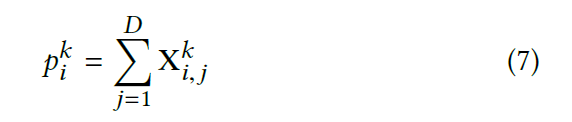

fori ∈ [1,Hk]. Thus, we have a pooling vector pk= [pk1 ,pk2 , ...,pkHk] with length Hk for the k-th hidden layer. All pooling vectors from hidden layers are concatenated before connected to output units: p+= [p1,p2, ...,pT] ∈ R. If we use CIN directly for binary classification, the output unit is a sigmoid node on p+:

因为i∈[1，Hk]。因此，对于第k个隐藏层，我们有一个长度为Hk的池向量pk=[pk1，pk2，…，pkHk]。所有来自隐藏层的池向量在连接到输出单元之前被串联：p+=[p1，p2，…，pT]∈R。如果我们直接使用CIN进行二值分类，则输出单元是p+上的sigmoid节点：

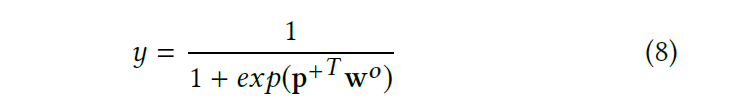
where ware the regression parameters.

回归参数在哪里。

# 3.2 CIN Analysis
# 3.2 CIN分析

We analyze the proposed CIN to study the model complexity and the potential effectiveness.

我们分析了提出的CIN模型，研究了模型的复杂性和稳定性潜在有效性。

3.2.1 Space Complexity.The h-th feature map at the k-th layer contains Hk-1× m parameters, which is exactly the size of Wk,h. Thus, there are Hk×Hk-1×m parameters at the k-th layer. Considering the last regression layer for the output unit, which has sigma Hk parameters, the total number of parameters for CIN is sigma Hk×(1 + Hk-1 × m). Note that CIN is independent of the embedding dimension D. In contrast, a plain T-layers DNN contains m × D × H1 + HT + sigma Hk × Hk-1 parameters, and the number of parameters will increase with the embedding dimension D.



3.2.1空间复杂性第k层的第h特征图包含Hk-1×m参数，正好是Wk，h的大小，因此第k层存在Hk×Hk-1×m参数。考虑到输出单元的最后一个回归层具有sigma Hk参数，CIN的参数总数为sigma Hk×（1+Hk-1×m）。请注意，CIN与嵌入维数D无关。相反，普通T层DNN包含m×D×H1+HT+sigma Hk×Hk-1参数，并且参数的数目将随着嵌入维数D的增加而增加。



Usually m and Hk will not be very large, so the scale of Wk,h,is acceptable. When necessary, we can exploit a L-order decomposition and replace Wk,h with two smaller matrices Uk,h∈R and Vk,h,∈ R:

通常m和Hk不会很大，因此Wk的规模h是可以接受的。必要时，我们可以利用L阶分解，用两个较小的矩阵Uk，h∈R和Vk，h，∈R替换Wk，h：

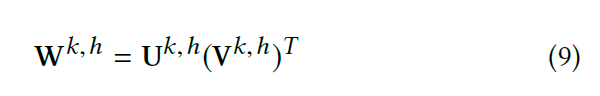

where L ≪ H and L ≪ m. Hereafter we assume that each hidden layer has the same number (which is H) of feature maps for simplicity. Through the L-order decomposition, the space complexity of CIN is reduced from O(mTH2) to O(mTHL+TH2). In contrast, the space complexity of the plain DNN is O(mDH +TH2), which is sensitive to the dimension (D) of field embedding.


其中L≪H和L≪m。为了简单起见，我们假设每个隐藏层具有相同数量（即H）的特征图。通过L阶分解，CIN的空间复杂度由O（mTH2）降低到O（mTHL+TH2）。相比之下，平面DNN的空间复杂度为O（mDH+TH2），它对域嵌入的维数（D）非常敏感。


3.2.2 Time Complexity.The cost of computing tensor Zk+1(as shown in Figure 4a) is O(mHD) time. Because we have H feature maps in one hidden layer, computing a T-layers CIN takes O(mH2DT) time. A T-layers plain DNN, by contrast, takesO(mHD+ H2T) time. Therefore, the major downside of CIN lies in the time complexity.

3.2.2时间复杂性计算张量Zk+1（如图4a所示）的代价是O（mHD）时间。因为我们在一个隐藏层中有H个特征映射，所以计算T层CIN需要O（mH2DT）时间。一个T层的普通DNN，相比之下，花费O（mHD+H2T）时间。因此，CIN的主要缺点在于时间复杂性。



3.2.3 Polynomial Approximation. Next we examine the high-order interaction properties of CIN. For simplicity, we assume that numbers of feature maps at hidden layers are all equal to the number of fields m. Let [m] denote the set of positive integers that are less than or equal to m. The h-th feature map at the first layer, denoted as xh , is calculated via:

3.2.3多项式近似。接下来我们研究了CIN的高阶相互作用性质。为简单起见，我们假设隐藏层的特征映射数都等于字段数m。让[m]表示小于或等于m的正整数集。第一层的第h个特征映射（表示为xh）通过以下公式计算：

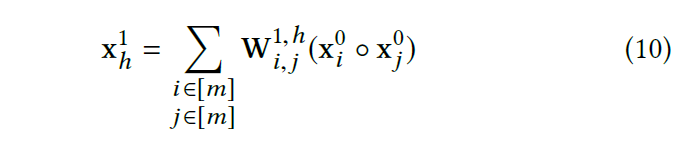

Therefore, each feature map at the first layer models pair-wise interactions with O(m) coefficients. Similarly, the h-th feature map at the second layer is:

因此，第一层的每个特征映射都用O（m2）系数来模拟成对的交互作用。类似地，第二层的第h特征图是：


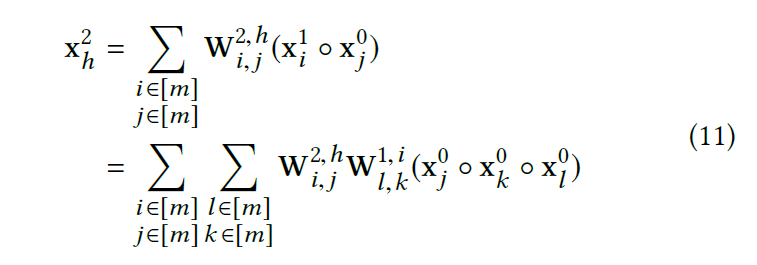



Note that all calculations related to the subscript l and k is already finished at the previous hidden layer. We expand the factors in Equation 11 just for clarity. We can observe that each feature map at the second layer models 3-way interactions with O(m2) new parameters.

请注意，与下标l和k相关的所有计算都已在上一个隐藏层完成。为了清楚起见，我们把等式11中的因子展开。我们可以观察到，第二层的每个特征映射都与O（m2）建立了三方交互模型新参数。

A classical k-order polynomial has O(m^k) coefficients. We show that CIN approximate this class of polynomial with only O(km^3) parameters in terms of a chain of feature maps. By induction hypothesis, we can prove that the h-th feature map at the k-th layer is:

经典的k阶多项式具有O（m^k）系数。我们证明了CIN仅用O（km^3）参数在一系列特征映射中逼近这类多项式。通过归纳假设，我们可以证明第k层的第h特征图为：

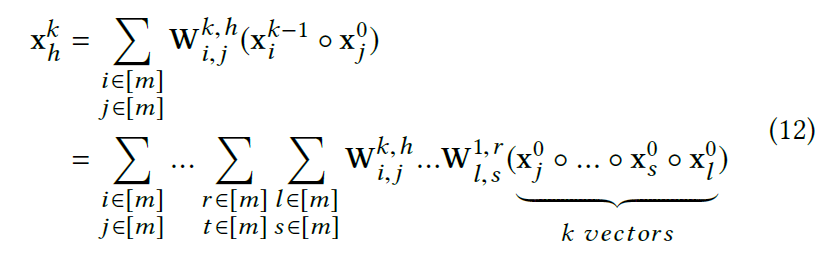

为了更好的说明，这里我们借用了[40]中的符号。让α=[α1，…，αm]∈Nd表示多指标，|α|= sigma αi 。我们从x0中省略原来的上标，并使用席表示它以来我们只需要从第0层（确切地说是最后展开表达式的字段嵌入（参见等式。12). 现在用上标表示向量运算，如同x3我=席兮席席。设VPk（X）表示一个多向量多项式k度：
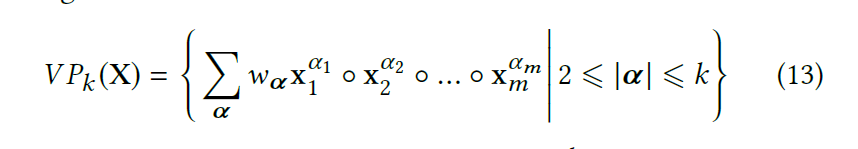

这类中的每个向量多项式都有O（mk）系数。那么，我们的CIN接近系数wα：
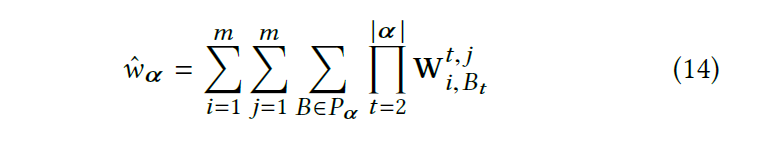